# Spatio-temporal zonal analysis

In [ ]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import pylandstats as pls

In order to perform zonal analyses over time, pylandstats features an additional `SpatioTemporalZonalAnalysis` analysis class - as well as `SpatioTemporalBufferAnalysis` and `SpatioTemporalZonalGridAnalysis`.

Like in the [spatio-temporal analysis example](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/02-spatiotemporal-analysis.ipynb), we will use the three extracts of [Veveyse district](https://en.wikipedia.org/wiki/Veveyse_District) from the [Swiss Land Statistics (SLS) datasets from the Swiss Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/land-use-cover-suitability/swiss-land-use-statistics.html) for the years 1980, 1992, 2004 and 2013, yet in this case we also need to specify how the buffers are constructed.

We first need to run the cell below so that:
- the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).
- the elevation zones vector data is downloaded and preprocessed (see [A04-elev-zones.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A04-elev-zones.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile veveyse_lulc_tifs elev_zones

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-07-25T194549.918020.snakemake.log


## Spatio-temporal zonal analysis

Besides the base LULC maps, we will use a geopackage file defining a set of elevation zones. Like with the `ZonalAnalysis` class, we can use the `zone_index` argument to indicate which column of the geopackage file will be used to index the zones:

In [ ]:
URBAN_CLASS_VAL = 1
input_filepaths = [
    "../data/processed/veveyse/LU85_4.tif",
    "../data/processed/veveyse/LU97_4.tif",
    "../data/processed/veveyse/LU09_4.tif",
    "../data/processed/veveyse/LU18_4.tif",
]
years = ["1980", "1992", "2004", "2013"]
elev_zones_filepath = "../data/processed/elev-zones.gpkg"

stza = pls.SpatioTemporalZonalAnalysis(
    input_filepaths, elev_zones_filepath, zone_index="elev-zone", dates=years
)

Like `SpatioTemporalAnalysis`, `BufferAnalysis` and/or `ZonalAnalysis`, we can compute the data frame of class metrics through the `compute_class_metrics_df` method:

In [ ]:
class_metrics_df = stza.compute_class_metrics_df()
class_metrics_df.head()

[                                        ] | 0% Completed | 1.69 s ms

/home/martibosch/data-science/landscape-connectivity-barcelona/src/pylandstats/pylandstats/landscape.py:1338: RuntimeWarning: Class 1 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
/home/martibosch/data-science/landscape-connectivity-barcelona/src/pylandstats/pylandstats/landscape.py:1338: RuntimeWarning: Class 1 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
/home/martibosch/data-science/landscape-connectivity-barcelona/src/pylandstats/pylandstats/landscape.py:1338: RuntimeWarning: Class 1 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


[                                        ] | 0% Completed | 2.04 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[##########                              ] | 25% Completed | 5.20 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[####################                    ] | 50% Completed | 5.99 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[##########################              ] | 66% Completed | 6.30 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[########################################] | 100% Completed | 6.50 s


total_area  proportion_of_landscape  \
class_val elev-zone date                                        
1         <1000     1980       602.0                 7.409231   
                    1992       680.0                 8.369231   
                    2004       786.0                 9.673846   
                    2013       911.0                11.212308   
          1000-1500 1980        89.0                 1.950471   

                          number_of_patches  patch_density  \
class_val elev-zone date                                     
1         <1000     1980                252       3.101538   
                    1992                250       3.076923   
                    2004                249       3.064615   
                    2013                232       2.855385   
          1000-1500 1980                 45       0.986193   

                          largest_patch_index  total_edge  edge_density  \
class_val elev-zone date                                                  
1         <1000     1980             0.750769    176100.0     21.673846   
                    1992             0.984615    191300.0     23.544615   
                    2004             1.144615    205700.0     25.316923   
                    2013             2.289231    219200.0     26.978462   
          1000-1500 1980             0.372562     28200.0      6.180145   

                          total_core_area  core_area_proportion_of_landscape  \
class_val elev-zone date                                                       
1         <1000     1980             24.0                           0.295385   
                    1992             27.0                           0.332308   
                    2004             48.0                           0.590769   
                    2013             87.0                           1.070769   
          1000-1500 1980              1.0                           0.021915   

                          number_of_disjunct_core_areas  ...  \
class_val elev-zone date                                 ...   
1         <1000     1980                              8  ...   
                    1992                              9  ...   
                    2004                             10  ...   
                    2013                             17  ...   
          1000-1500 1980                              1  ...   

                          euclidean_nearest_neighbor_md  \
class_val elev-zone date                                  
1         <1000     1980                     223.606798   
                    1992                     223.606798   
                    2004                     223.606798   
                    2013                     223.606798   
          1000-1500 1980                     300.000000   

                          euclidean_nearest_neighbor_ra  \
class_val elev-zone date                                  
1         <1000     1980                     581.024968   
                    1992                     581.024968   
                    2004                     581.024968   
                    2013                     561.577311   
          1000-1500 1980                    2616.025568   

                          euclidean_nearest_neighbor_sd  \
class_val elev-zone date                                  
1         <1000     1980                     124.937258   
                    1992                     114.225158   
                    2004                     111.658845   
                    2013                     109.128542   
          1000-1500 1980                     501.796831   

                          euclidean_nearest_neighbor_cv  \
class_val elev-zone date                                  
1         <1000     1980                      43.480370   
                    1992                      41.006394   
                    2004                      40.706115   
                    2013                      39.692040   
   

Note that in this case, the data frame features a three-level [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) that distinguishes the computed value for each class, zone and date. Again, we can operate upon such data frames as we would do with any other pandas data frame. For instance, we might want to evaluate the difference between the proportion of landscape occupied of urban patches (represented by a `class_val` of 1) computed for the elevation zone of "<1000" and ">1500":

In [ ]:
(
    class_metrics_df.loc[(1, "<1000"), "proportion_of_landscape"]
    - class_metrics_df.loc[(1, ">1500"), "proportion_of_landscape"]
)

date
1980     7.198260
1992     7.947290
2004     9.251905
2013    10.790367
Name: proportion_of_landscape, dtype: float64

Likewise in the other classes of pylandstats, if we want to compute the metrics data frame only for a subset of metrics or classes, or customize how the metrics are computed, we must respectively pass the arguments `metrics`, `classes` or `metrics_kwargs` to the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods of `SpatioTemporalZonalAnalysis` as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density", "fractal_dimension_am"]
classes = [URBAN_CLASS_VAL]
metrics_kwargs = {
    "proportion_of_landscape": {"percent": False},
    "edge_density": {"count_boundary": True},
}
stza.compute_class_metrics_df(
    metrics=metrics, classes=classes, metrics_kwargs=metrics_kwargs
)

[########################################] | 100% Completed | 101.97 ms


proportion_of_landscape  edge_density  \
class_val elev-zone date                                          
1         <1000     1980                 0.074092     21.981538   
                    1992                 0.083692     23.876923   
                    2004                 0.096738     25.698462   
                    2013                 0.112123     27.470769   
          1000-1500 1980                 0.019505      6.267806   
                    1992                 0.022135      6.925268   
                    2004                 0.023669      6.969099   
                    2013                 0.025641      7.232084   
          >1500     1980                 0.002110      0.843882   
                    1992                 0.004219      1.687764   
                    2004                 0.004219      1.687764   
                    2013                 0.004219      1.687764   

                          fractal_dimension_am  
class_val elev-zone date                        
1         <1000     1980              1.074651  
                    1992              1.086550  
                    2004              1.092837  
                    2013              1.119244  
          1000-1500 1980              1.067433  
                    1992              1.067187  
                    2004              1.068350  
                    2013              1.067263  
          >1500     1980              1.000000  
                    1992              1.000000  
                    2004              1.000000  
                    2013              1.000000

Another important functionality of the `SpatioTemporalZonalAnalysis` is plotting the time series of metrics at each zone. We can accomplish that through the `plot_metric` method. For instance, let us plot the proportion of landscape at the level of the *urban* class (`class_val` of 1):

[########################################] | 100% Completed | 101.45 ms


<Axes: ylabel='PLAND'>

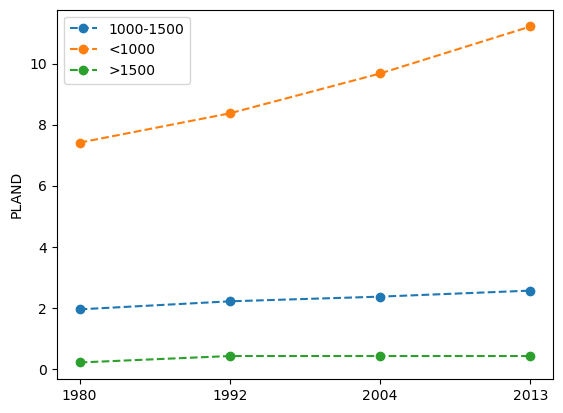

In [ ]:
stza.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

It can also be interesting to visualize such information in space by using `compute_zonal_statistics_gdf` method to obtain a geo-data frame:

In [ ]:
zonal_statistics_gdf = stza.compute_zonal_statistics_gdf(
    metrics=metrics, class_val=URBAN_CLASS_VAL
)
zonal_statistics_gdf

[########################################] | 100% Completed | 101.07 ms


edge_density                                  fractal_dimension_am  \
date              1980       1992       2004       2013                 1980   
elev-zone                                                                      
1000-1500     6.180145   6.837607   6.793776   7.056761             1.067433   
<1000        21.673846  23.544615  25.316923  26.978462             1.074651   
>1500         0.210970   1.054852   1.054852   1.054852             1.000000   

                                        proportion_of_landscape            \
date           1992      2004      2013                    1980      1992   
elev-zone                                                                   
1000-1500  1.067187  1.068350  1.067263                1.950471  2.213456   
<1000      1.086550  1.092837  1.119244                7.409231  8.369231   
>1500      1.000000  1.000000  1.000000                0.210970  0.421941   

                                \
date           2004       2013   
elev-zone                        
1000-1500  2.366864   2.564103   
<1000      9.673846  11.212308   
>1500      0.421941   0.421941   

                                                    geometry  
date                                                          
elev-zone                                                     
1000-1500  POLYGON ((2563900.000 1160700.000, 2563900.000...  
<1000      MULTIPOLYGON (((2560900.000 1150500.000, 25607...  
>1500      MULTIPOLYGON (((2566300.000 1151500.000, 25665...

Note that the columns of the geo-data frame are indexed in two levels, namely the metrics and dates. Since now we have a time series of values, we can spatially plot the evolution of the metrics at each zone:

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is

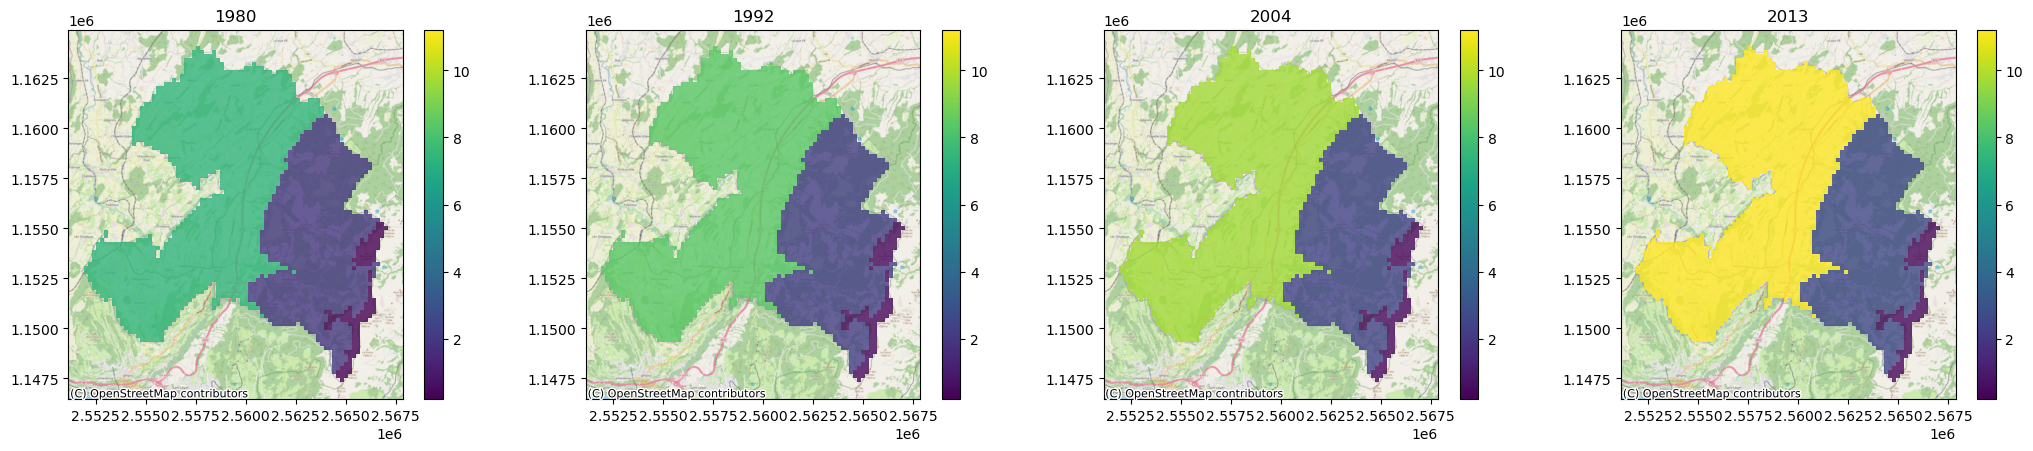

In [ ]:
num_years = len(years)
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, num_years, figsize=(num_years * figwidth, figheight))

# get min and max values for all years to have the same scale accross plots
vmin = zonal_statistics_gdf["proportion_of_landscape"].min().min()
vmax = zonal_statistics_gdf["proportion_of_landscape"].max().max()
for year, ax in zip(years, axes):
    zonal_statistics_gdf.plot(
        ("proportion_of_landscape", year),
        ax=ax,
        alpha=0.8,
        legend=True,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(year)
    cx.add_basemap(
        ax, crs=zonal_statistics_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik
    )

In fact, we can apply any transformation to the geo-data frame to visualize the metrics as required. For instance, we can transform the data frame to have separate columns for each year (how this is accomplished is beyond the scope of this tutorial), so that we can explore all the metrics values in the map:

In [ ]:
plot_gdf = zonal_statistics_gdf.copy()  # drop("geometry", axis=1).unstack()
plot_gdf.columns = plot_gdf.columns.to_flat_index().map(lambda tup: "-".join(tup))
plot_gdf = gpd.GeoDataFrame(
    plot_gdf,
    geometry=plot_gdf.reset_index()["elev-zone"].map(stza.zone_gser).values,
    crs=stza.zone_gser.crs,
)
plot_gdf.explore()

## Spatiotemporal buffer analysis

Let us now consider three buffers of 2, 4 and 6km around the center of the town of Chatel-St-Denis. We can explore how landscape metrics at such extents change through times by using the `SpatioTemporalBufferAnalysis` class as in:

In [ ]:
# latitude and longitude of the center of Chatel-St-Denis according to OpenStreetMap
base_geom = Point(6.8992073, 46.52634)
base_geom_crs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

# buffer distances (in meters)
buffer_dists = [2000, 4000, 6000]

stba = pls.SpatioTemporalBufferAnalysis(
    input_filepaths, base_geom, buffer_dists, base_geom_crs=base_geom_crs, dates=years
)

Analogously to `BufferAnalysis`, we could also initialize the from a polygon geometry (such an administrative boundary) by passing such object as the `base_geom` argument. See [the zonal analysis notebook](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/03-zonal-analysis.ipynb) to see how this can be done

The functionalities of `SpatioTemporalBufferAnalysis` are essentially the same as those of `SpatioTemporalZonalAnalysis` reviewed above:

In [ ]:
class_metrics_df = stba.compute_class_metrics_df()
class_metrics_df.head()

[########################################] | 100% Completed | 2.73 ss


total_area  proportion_of_landscape  \
class_val buffer_dist date                                        
1         2000        1980       190.0                16.379310   
                      1992       205.0                17.672414   
                      2004       245.0                21.120690   
                      2013       281.0                24.224138   
          4000        1980       308.0                 8.358209   

                            number_of_patches  patch_density  \
class_val buffer_dist date                                     
1         2000        1980                 38       3.275862   
                      1992                 38       3.275862   
                      2004                 34       2.931034   
                      2013                 25       2.155172   
          4000        1980                 92       2.496608   

                            largest_patch_index  total_edge  edge_density  \
class_val buffer_dist date                                                  
1         2000        1980             5.258621     41700.0     35.948276   
                      1992             6.982759     45100.0     38.879310   
                      2004             8.103448     48900.0     42.155172   
                      2013            16.465517     50900.0     43.879310   
          4000        1980             1.655360     77700.0     21.085482   

                            total_core_area  \
class_val buffer_dist date                    
1         2000        1980             16.0   
                      1992             20.0   
                      2004             29.0   
                      2013             45.0   
          4000        1980             17.0   

                            core_area_proportion_of_landscape  \
class_val buffer_dist date                                      
1         2000        1980                           1.379310   
                      1992                           1.724138   
                      2004                           2.500000   
                      2013                           3.879310   
          4000        1980                           0.461330   

                            number_of_disjunct_core_areas  ...  \
class_val buffer_dist date                                 ...   
1         2000        1980                              4  ...   
                      1992                              4  ...   
                      2004                              6  ...   
                      2013                              7  ...   
          4000        1980                              5  ...   

                            euclidean_nearest_neighbor_md  \
class_val buffer_dist date                                  
1         2000        1980                     223.606798   
                      1992                     223.606798   
                      2004                     211.803399   
                      2013                     223.606798   
          4000        1980                     223.606798   

                            euclidean_nearest_neighbor_ra  \
class_val buffer_dist date                                  
1         2000        1980                     300.000000   
                      1992                     300.000000   
                      2004                     300.000000   
                      2013                     365.685425   
          4000        1980                     581.024968   

                            euclidean_nearest_neighbor_sd  \
class_val buffer_dist date                                  
1         2000        1980                      93.295941   
                      1992                      87.204668   
                      2004                      73.176539   
                      2013                      98.258940   
          4000        1980                     121.965405   

                            euclidea

In [ ]:
stba.compute_landscape_metrics_df()

[########################################] | 100% Completed | 1.82 ss


total_area  number_of_patches  patch_density  \
buffer_dist date                                                 
2000        1980      1160.0                 85       7.327586   
            1992      1160.0                 82       7.068966   
            2004      1160.0                 81       6.982759   
            2013      1160.0                 75       6.465517   
4000        1980      3685.0                211       5.725916   
            1992      3685.0                209       5.671642   
            2004      3685.0                199       5.400271   
            2013      3685.0                188       5.101764   
6000        1980      7195.0                394       5.476025   
            1992      7195.0                384       5.337040   
            2004      7195.0                367       5.100764   
            2013      7195.0                362       5.031272   

                  largest_patch_index  total_edge  edge_density  \
buffer_dist date                                                  
2000        1980            52.500000     71400.0     61.551724   
            1992            51.551724     73300.0     63.189655   
            2004            48.965517     76700.0     66.120690   
            2013            46.206897     78800.0     67.931034   
4000        1980            51.804613    205500.0     55.766621   
            1992            51.316147    209200.0     56.770692   
            2004            49.877883    213800.0     58.018996   
            2013            48.059701    218900.0     59.402985   
6000        1980            53.787352    392900.0     54.607366   
            1992            52.008339    400300.0     55.635858   
            2004            50.965949    402500.0     55.941626   
            2013            49.478805    408200.0     56.733843   

                  total_core_area  number_of_disjunct_core_areas  \
buffer_dist date                                                   
2000        1980            344.0                             32   
            1992            320.0                             33   
            2004            292.0                             38   
            2013            286.0                             37   
4000        1980           1307.0                             73   
            1992           1280.0                             75   
            2004           1231.0                             80   
            2013           1195.0                             85   
6000        1980           2680.0                            123   
            1992           2601.0                            138   
            2004           2549.0                            144   
            2013           2500.0                            151   

                  landscape_shape_index  effective_mesh_size  ...  \
buffer_dist date                                              ...   
2000        1980               6.492754           351.498276  ...   
            1992               6.630435           341.605172  ...   
            2004               6.876812           301.660345  ...   
            2013               7.028986           294.739655  ...   
4000        1980              10.012295          1054.102849  ...   
            1992              10.163934          1050.495251  ...   
            2004              10.352459           989.770692  ...   
            2013              10.561475           932.959294  ...   
6000        1980              13.426471          2200.019319  ...   
            1992              13.644118          2117.035580  ...   
            2004              13.708824          2041.172620  ...   
            2013              13.876471          1938.907436  ...   

                  euclidean_nearest_neighbor_md  \
buffer_dist date                                  
2000        1980                     223.606798   
            1992                     223.606798   
            2004              

Similarly, we can produce the same plot at the landscape level by ommiting the `class_val` argument:

[########################################] | 100% Completed | 101.57 ms


<Axes: ylabel='FRAC_AM'>

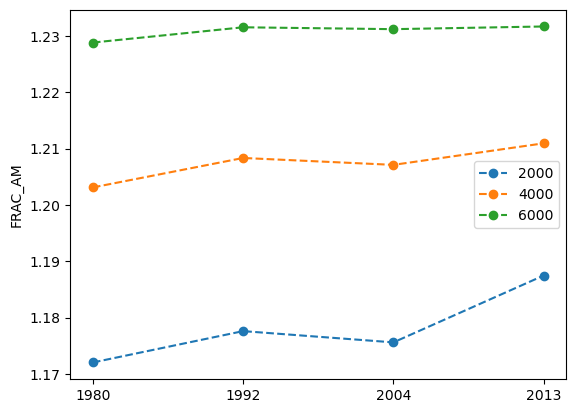

In [ ]:
stba.plot_metric("fractal_dimension_am")

In this case, the legend shows the buffer distance that corresponds to the plotted line.

## Spatiotemporal zonal grid analysis

Finally, we can explore the temporal evolution of landscape metrics over a single regular rectangular grid using the `SpatioTemporalZonalGridAnalysis` class:

In [ ]:
zone_width, zone_height = 2000, 2000  # in this case, in meters

stzga = pls.SpatioTemporalZonalGridAnalysis(
    input_filepaths, zone_width=zone_width, zone_height=zone_height, dates=years
)

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


Likewise with `ZonalAnalysis` we can also define the number of zones that we desire in each dimension by means of the `num_zone_rows` and `num_zone_cols` keyword arguments of the initialization method.

Again, the functionalities of `SpatioTemporalZonalGridAnalysis` are essentially the same as those of `SpatioTemporalZonalAnalysis` (and `SpatioTemporalBufferAnalysis`) reviewed above:

In [ ]:
class_metrics_df = stzga.compute_class_metrics_df(metrics=metrics)
class_metrics_df.head()

[########################################] | 100% Completed | 2.15 sms


proportion_of_landscape  edge_density  \
class_val grid_cell date                                          
1         2         1980                 8.241758     22.527473   
                    1992                 9.340659     24.725275   
                    2004                 9.890110     25.274725   
                    2013                12.087912     30.219780   
          3         1980                 1.801802      6.756757   

                          fractal_dimension_am  
class_val grid_cell date                        
1         2         1980              1.018398  
                    1992              1.057659  
                    2004              1.063133  
                    2013              1.081621  
          3         1980              1.034995